In [1]:
import os
import functools
import logging


import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

logger = logging.getLogger()
logger.setLevel(logging.ERROR)

# 1.Configuration

In [2]:
RAW_BASE_DIR = "C:/Others/Mahsa-UoR/Project/wisdm-dataset/raw/"
RAW_COL_NAMES = ["SubjectID", "ActivityCode", "Timestamp", "X", "Y", "Z"]
PROCESS_BASE_DIR = "C:/Others/Mahsa-UoR/Project/wisdm-dataset/processed"

ACTIVITIES_MAP = {"A": "Walking",
                  "B": "Jogging",
                  "C": "Stairs",
                  "D": "Sitting",
                  "E": "Standing",
                  "F": "Typing",
                  "G": "Brushing",
                  "H": "Eat Soup",
                  "I": "Eat Chips",
                  "J": "Eat Pasta",
                  "K": "Drinking",
                  "L": "Eat Sandwich",
                  "M": "Kicking",
                  "O": "Playing",
                  "P": "Dribblinlg",
                  "Q": "Writing",
                  "R": "Clapping",
                  "S": "Folding"
                  }

# 2.Raw Files

## 2.1.Convert Raw Files to CSV

In [3]:
def get_raw_files_path(base_raw_path):
    phone_accel_file = []
    phone_gyro_file = []
    watch_accel_file = []
    watch_gyro_file = []

    for directories, subdirectories, files in os.walk(base_raw_path):
        for filename in files:
            if "phone" in filename and "accel" in filename:
                phone_accel_file.append(
                    f"{base_raw_path}phone/accel/{filename}")
            elif "phone" in filename and "gyro" in filename:
                phone_gyro_file.append(
                    f"{base_raw_path}phone/gyro/{filename}")
            elif "watch" in filename and "accel" in filename:
                watch_accel_file.append(
                    f"{base_raw_path}watch/accel/{filename}")
            elif "watch" in filename and "gyro" in filename:
                watch_gyro_file.append(
                    f"{base_raw_path}watch/gyro/{filename}")
    logger.info(f"phone_accel_file: [{len(phone_accel_file)}]")
    logger.info(f"phone_gyro_file : [{len(phone_gyro_file)}]")
    logger.info(f"watch_accel_file: [{len(watch_accel_file)}]")
    logger.info(f"watch_gyro_file : [{len(watch_gyro_file)}]")
    return phone_accel_file, phone_gyro_file, watch_accel_file, watch_gyro_file


def raw_files_to_csv(files_path):
    csv = pd.concat(map(functools.partial(pd.read_csv, names=RAW_COL_NAMES, header=None), files_path))
    logger.debug(f"[{os.path.dirname(files_path[0])}] was loaded with [{csv.shape[0]}] records.")
    return csv


phone_accel_file, phone_gyro_file, watch_accel_file, watch_gyro_file = get_raw_files_path(RAW_BASE_DIR)

phone_accel_csv = raw_files_to_csv(phone_accel_file)
phone_gyro_csv = raw_files_to_csv(phone_gyro_file)
watch_accel_csv = raw_files_to_csv(watch_accel_file)
watch_gyro_csv = raw_files_to_csv(watch_gyro_file)

phone_accel_csv.to_csv(os.path.join(PROCESS_BASE_DIR, "phone_accel.csv"), index=False)
phone_gyro_csv.to_csv(os.path.join(PROCESS_BASE_DIR, "phone_gyro.csv"), index=False)
watch_accel_csv.to_csv(os.path.join(PROCESS_BASE_DIR, "watch_accel.csv"), index=False)
watch_gyro_csv.to_csv(os.path.join(PROCESS_BASE_DIR, "watch_gyro.csv"), index=False)

del phone_accel_csv
del phone_gyro_csv
del watch_accel_csv
del watch_gyro_csv

In [3]:
def load_and_clean_csv(path):
    df = pd.read_csv(path)
    df["ActivityCode"] = df["ActivityCode"].astype('string')
    df["X"] = df["X"].astype('float32')
    df["Y"] = df["Y"].astype('float32')
    df["Z"] = df["Z"].apply(lambda x: x.replace(';', '')).astype('float32')
    return df

In [28]:
phone_accel = load_and_clean_csv(os.path.join(PROCESS_BASE_DIR, "phone_accel.csv"))
watch_accel = load_and_clean_csv(os.path.join(PROCESS_BASE_DIR, "watch_accel.csv"))

phone_gyro = load_and_clean_csv(os.path.join(PROCESS_BASE_DIR, "phone_gyro.csv"))
watch_gyro = load_and_clean_csv(os.path.join(PROCESS_BASE_DIR, "watch_gyro.csv"))

## 2.2. CSV files statistical information

In [29]:
headers = [
    'Device', 'Sensor', 'Number of Samples', 'Number of Test Subject', 'Number of Activity',
    'Max X', 'Min X', 'Mean X',
    'Max Y', 'Min Y', 'Mean Y',
    'Max Z', 'Min Z', 'Mean Z'
]

phone_accel_row = [
    'Phone',
    'Accelerometer',
    len(phone_accel.index),
    phone_accel['SubjectID'].nunique(),
    phone_accel['ActivityCode'].nunique(),
    phone_accel['X'].max(), phone_accel['X'].min(), phone_accel['X'].mean(),
    phone_accel['Y'].max(), phone_accel['Y'].min(), phone_accel['Y'].mean(),
    phone_accel['Z'].max(), phone_accel['Z'].min(), phone_accel['Z'].mean()
]

watch_accel_row = [
    'Watch',
    'Accelerometer',
    len(watch_accel.index),
    watch_accel['SubjectID'].nunique(),
    watch_accel['ActivityCode'].nunique(),
    watch_accel['X'].max(), watch_accel['X'].min(), watch_accel['X'].mean(),
    watch_accel['Y'].max(), watch_accel['Y'].min(), watch_accel['Y'].mean(),
    watch_accel['Z'].max(), watch_accel['Z'].min(), watch_accel['Z'].mean()
]

phone_gyro_row = [
    'Phone',
    'Gyroscope',
    len(phone_gyro.index),
    phone_gyro['SubjectID'].nunique(),
    phone_gyro['ActivityCode'].nunique(),
    phone_gyro['X'].max(), phone_gyro['X'].min(), phone_gyro['X'].mean(),
    phone_gyro['Y'].max(), phone_gyro['Y'].min(), phone_gyro['Y'].mean(),
    phone_gyro['Z'].max(), phone_gyro['Z'].min(), phone_gyro['Z'].mean()
]

watch_gyro_row = [
    'Watch',
    'Gyroscope',
    len(watch_gyro.index),
    watch_gyro['SubjectID'].nunique(),
    watch_gyro['ActivityCode'].nunique(),
    watch_gyro['X'].max(), watch_gyro['X'].min(), watch_gyro['X'].mean(),
    watch_gyro['Y'].max(), watch_gyro['Y'].min(), watch_gyro['Y'].mean(),
    watch_gyro['Z'].max(), watch_gyro['Z'].min(), watch_gyro['Z'].mean()
]

raw_stat_df = pd.DataFrame([phone_accel_row, watch_accel_row, phone_gyro_row, watch_gyro_row], columns=headers)
raw_stat_df

,Device,Sensor,Number of Samples,Number of Test Subject,Number of Activity,Max X,Min X,Mean X,Max Y,Min Y,Mean Y,Max Z,Min Z,Mean Z
0,Phone,Accelerometer,4804403,51,18,78.477608,-78.477608,0.141540,64.411659,-78.477608,-1.685717,69.081947,-78.477608,0.350355
1,Watch,Accelerometer,3777046,51,18,52.113232,-70.631523,0.383172,35.601967,-78.477608,-4.478841,66.615074,-78.477608,1.848123
2,Phone,Gyroscope,3608635,51,18,23.529480,-24.770920,-0.004203,31.623199,-34.978287,-0.005035,18.548330,-34.984863,-0.001548
3,Watch,Gyroscope,3440342,51,18,34.905415,-34.917301,-0.027115,34.069073,-34.900162,-0.028351,18.418898,-34.548958,0.014183


## 2.3 

array([<AxesSubplot:title={'center':'Z'}>], dtype=object)

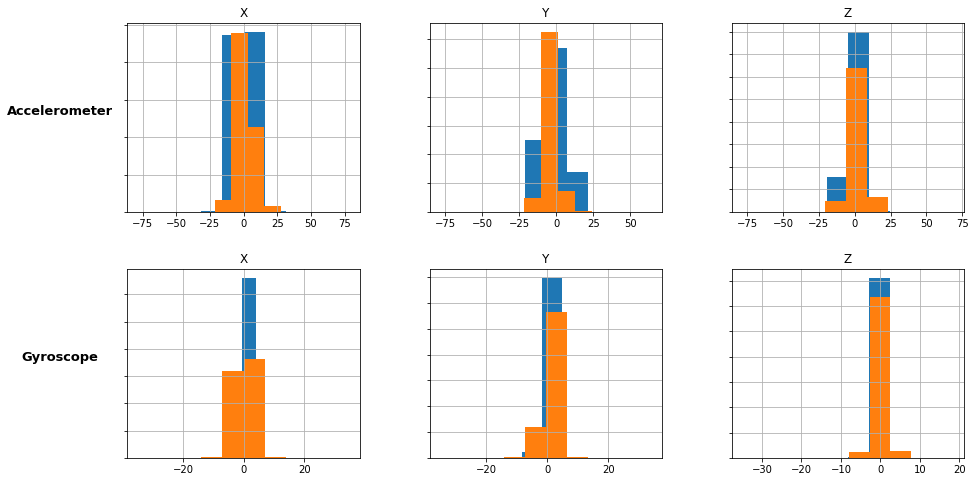

In [30]:
fig, ax = plt.subplots(2,3, figsize=(15, 8))

ax[0][0].set_ylabel("Accelerometer", rotation=0, labelpad=60, fontsize=13, fontweight='700')
ax[1][0].set_ylabel("Gyroscope", rotation=0, labelpad=60, fontsize=13, fontweight='700')
ax[0][0].set_yticklabels([])
ax[0][1].set_yticklabels([])
ax[0][2].set_yticklabels([])
ax[1][0].set_yticklabels([])
ax[1][1].set_yticklabels([])
ax[1][2].set_yticklabels([])

phone_accel.hist(column = 'X', ax = ax[0][0])
phone_accel.hist(column = 'Y', ax = ax[0][1])
phone_accel.hist(column = 'Z', ax = ax[0][2])

watch_accel.hist(column = 'X', ax = ax[0][0])
watch_accel.hist(column = 'Y', ax = ax[0][1])
watch_accel.hist(column = 'Z', ax = ax[0][2])

phone_gyro.hist(column = 'X', ax = ax[1][0])
phone_gyro.hist(column = 'Y', ax = ax[1][1])
phone_gyro.hist(column = 'Z', ax = ax[1][2])

watch_gyro.hist(column = 'X', ax = ax[1][0])
watch_gyro.hist(column = 'Y', ax = ax[1][1])
watch_gyro.hist(column = 'Z', ax = ax[1][2])


{'whiskers': [<matplotlib.lines.Line2D at 0x259241bb5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x259241bbb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x259241bb2e0>,
 'medians': [<matplotlib.lines.Line2D at 0x259241c4130>,
 'fliers': [],
 'means': []}

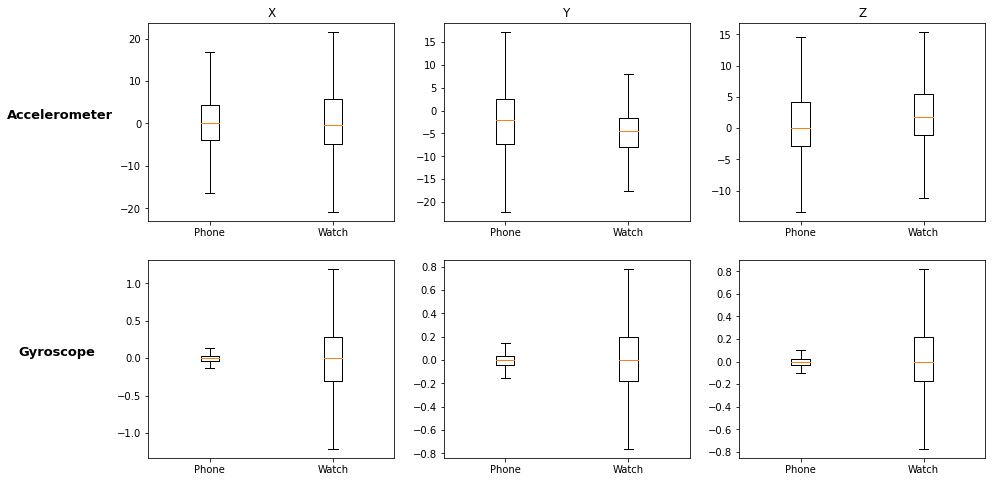

In [31]:
fig, ax = plt.subplots(2,3, figsize=(15, 8))

ax[0][0].set_ylabel("Accelerometer", rotation=0, labelpad=60, fontsize=13, fontweight='700')
ax[1][0].set_ylabel("Gyroscope", rotation=0, labelpad=60, fontsize=13, fontweight='700')
ax[0][0].set_title("X")
ax[0][1].set_title("Y")
ax[0][2].set_title("Z")

ax[0][0].boxplot([phone_accel['X'],watch_accel['X']],  showfliers=False, labels = ['Phone', 'Watch'])
ax[0][1].boxplot([phone_accel['Y'],watch_accel['Y']],  showfliers=False, labels = ['Phone', 'Watch'])
ax[0][2].boxplot([phone_accel['Z'],watch_accel['Z']],  showfliers=False, labels = ['Phone', 'Watch'])

ax[1][0].boxplot([phone_gyro['X'],watch_gyro['X']],  showfliers=False, labels = ['Phone', 'Watch'])
ax[1][1].boxplot([phone_gyro['Y'],watch_gyro['Y']],  showfliers=False, labels = ['Phone', 'Watch'])
ax[1][2].boxplot([phone_gyro['Z'],watch_gyro['Z']],  showfliers=False, labels = ['Phone', 'Watch'])


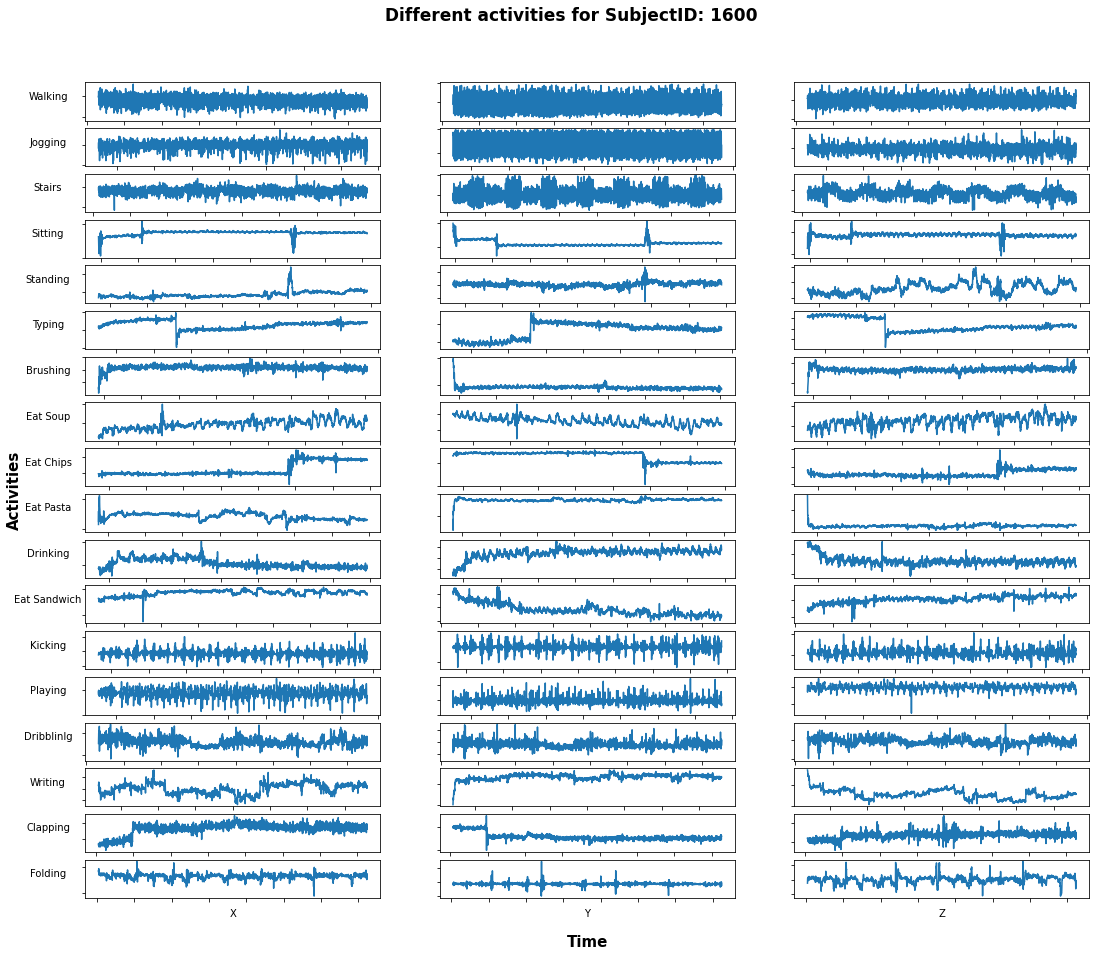

In [32]:
import matplotlib.pyplot as plt

def format_ax(ax, ylbl = None, xlbl = None):
    ax.set_ylabel(ylbl, rotation=0, labelpad=30)
    ax.set_xlabel(xlbl, rotation=0, loc='center')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
for person in phone_accel["SubjectID"].unique()[:1]:
    fig, ax = plt.subplots(len(ACTIVITIES_MAP),3, figsize=(18, 15))
    fig.suptitle(f"Different activities for SubjectID: {person}", x=0.5, y=.95, fontsize=17, fontweight='700')
    for index, (code, activity) in enumerate(ACTIVITIES_MAP.items()):
        df_activiy = phone_accel[(phone_accel["SubjectID"] == person) & (phone_accel["ActivityCode"] == code)]
        ax[index][0].plot(df_activiy["Timestamp"], df_activiy["X"])
        ax[index][1].plot(df_activiy["Timestamp"], df_activiy["Y"])
        ax[index][2].plot(df_activiy["Timestamp"], df_activiy["Z"])
        format_ax(ax[index][0], activity, "X")
        format_ax(ax[index][1], None, "Y")
        format_ax(ax[index][2], None, "Z")
    
    fig.add_subplot(1, 1, 1, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel('Time', fontsize=15, fontweight='bold', labelpad=20)
    plt.ylabel('Activities', fontsize=15, fontweight='bold', labelpad=40)

    


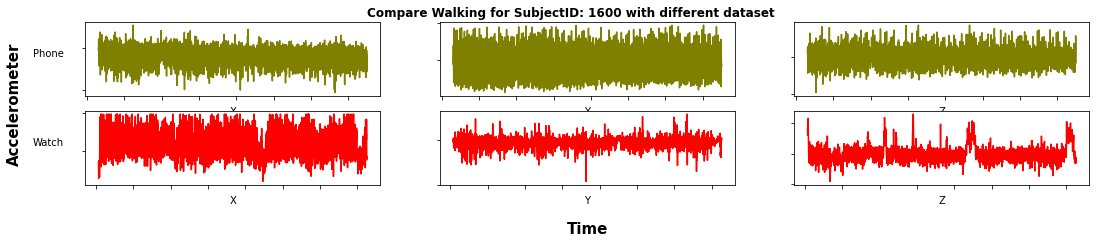

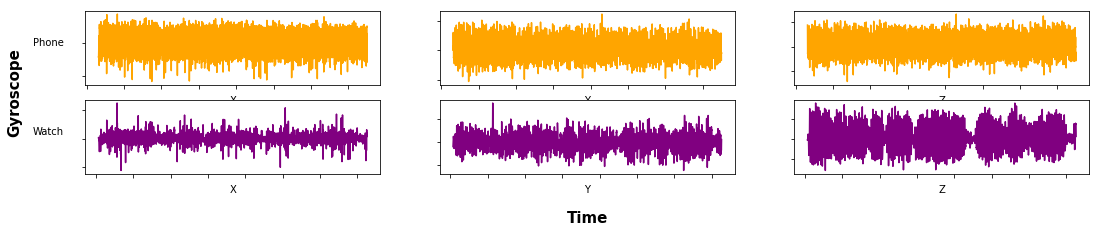

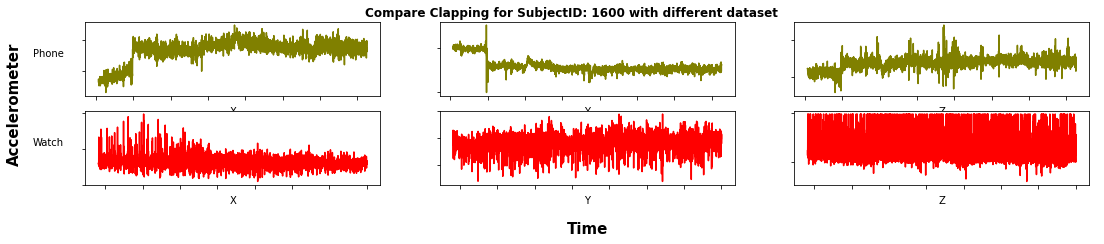

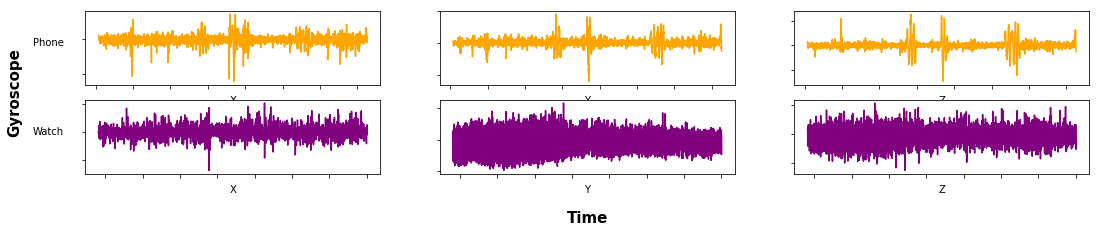

In [42]:
import matplotlib.pyplot as plt

def format_ax(ax, ylbl = None, xlbl = None):
    ax.set_ylabel(ylbl, rotation=0, labelpad=30)
    ax.set_xlabel(xlbl, rotation=0, loc='center')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

def plot_activity_per_subject_all_sensors(person, activity_code, activity):
    fig, ax = plt.subplots(2, 3, figsize=(18, 3))
    fig.suptitle(f"Compare {activity} for SubjectID: {person} with different dataset", x=0.5, y=.95, fontsize=12, fontweight='700')

    df_p_activiy = phone_accel[(phone_accel["SubjectID"] == person) & (phone_accel["ActivityCode"] == activity_code)]
    ax[0][0].plot(df_p_activiy["Timestamp"], df_p_activiy["X"], color="olive")
    ax[0][1].plot(df_p_activiy["Timestamp"], df_p_activiy["Y"], color="olive")
    ax[0][2].plot(df_p_activiy["Timestamp"], df_p_activiy["Z"], color="olive")
    format_ax(ax[0][0], "Phone", "X")
    format_ax(ax[0][1], None, "Y")
    format_ax(ax[0][2], None, "Z")

    df_w_activiy = watch_accel[(watch_accel["SubjectID"] == person) & (watch_accel["ActivityCode"] == activity_code)]
    ax[1][0].plot(df_w_activiy["Timestamp"], df_w_activiy["X"], color="red")
    ax[1][1].plot(df_w_activiy["Timestamp"], df_w_activiy["Y"], color="red")
    ax[1][2].plot(df_w_activiy["Timestamp"], df_w_activiy["Z"], color="red")
    format_ax(ax[1][0], "Watch", "X")
    format_ax(ax[1][1], None, "Y")
    format_ax(ax[1][2], None, "Z")
    
    fig.add_subplot(1, 1, 1, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel('Time', fontsize=15, fontweight='bold', labelpad=20)
    plt.ylabel('Accelerometer', fontsize=15, fontweight='bold', labelpad=40)
    
    fig, ax = plt.subplots(2, 3, figsize=(18, 3))
    df_p_activiy = phone_gyro[(phone_gyro["SubjectID"] == person) & (phone_gyro["ActivityCode"] == activity_code)]
    ax[0][0].plot(df_p_activiy["Timestamp"], df_p_activiy["X"], color="orange")
    ax[0][1].plot(df_p_activiy["Timestamp"], df_p_activiy["Y"], color="orange")
    ax[0][2].plot(df_p_activiy["Timestamp"], df_p_activiy["Z"], color="orange")
    format_ax(ax[0][0], "Phone", "X")
    format_ax(ax[0][1], None, "Y")
    format_ax(ax[0][2], None, "Z")

    df_w_activiy = watch_gyro[(watch_gyro["SubjectID"] == person) & (watch_gyro["ActivityCode"] == activity_code)]
    ax[1][0].plot(df_w_activiy["Timestamp"], df_w_activiy["X"], color="purple")
    ax[1][1].plot(df_w_activiy["Timestamp"], df_w_activiy["Y"], color="purple")
    ax[1][2].plot(df_w_activiy["Timestamp"], df_w_activiy["Z"], color="purple")
    format_ax(ax[1][0], "Watch", "X")
    format_ax(ax[1][1], None, "Y")
    format_ax(ax[1][2], None, "Z")
    
    fig.add_subplot(1, 1, 1, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel('Time', fontsize=15, fontweight='bold', labelpad=20)
    plt.ylabel('Gyroscope', fontsize=15, fontweight='bold', labelpad=40)


    

plot_activity_per_subject_all_sensors(1600, "A", "Walking" )
plot_activity_per_subject_all_sensors(1600, "R", "Clapping" )

Text(0, 0.5, 'Walking')

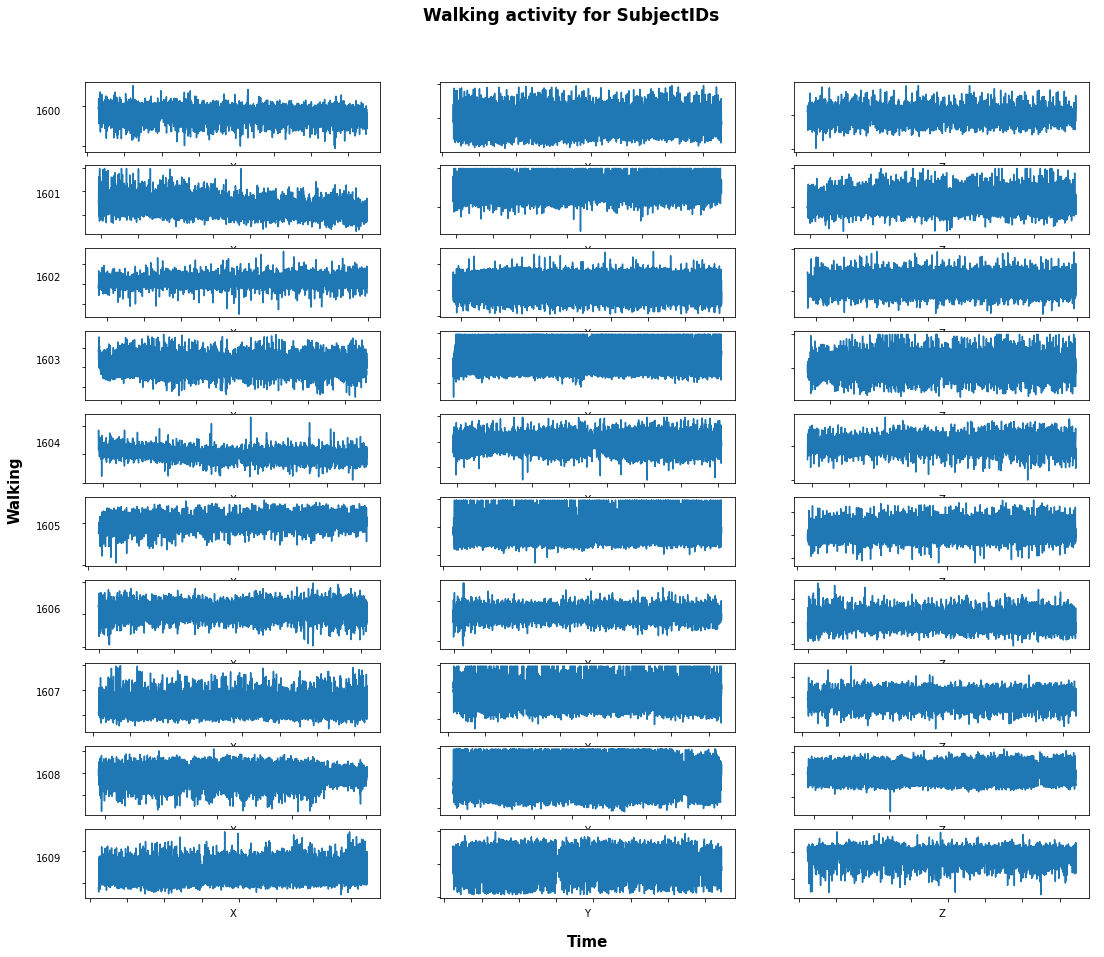

In [18]:
def format_ax(ax, ylbl = None, xlbl = None):
    ax.set_ylabel(ylbl, rotation=0, labelpad=30)
    ax.set_xlabel(xlbl, rotation=0, loc='center')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

fig, ax = plt.subplots(10, 3, figsize=(18, 15))
fig.suptitle(f"Walking activity for SubjectIDs", x=0.5, y=.95, fontsize=17, fontweight='700')
for index,person in enumerate(phone_accel["SubjectID"].unique()[:10]):
    
    df_activiy = phone_accel[(phone_accel["SubjectID"] == person) & (phone_accel["ActivityCode"] == "A")]
    ax[index][0].plot(df_activiy["Timestamp"], df_activiy["X"])
    ax[index][1].plot(df_activiy["Timestamp"], df_activiy["Y"])
    ax[index][2].plot(df_activiy["Timestamp"], df_activiy["Z"])
    format_ax(ax[index][0], person, "X")
    format_ax(ax[index][1], None, "Y")
    format_ax(ax[index][2], None, "Z")
    
fig.add_subplot(1, 1, 1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel('Time', fontsize=15, fontweight='bold', labelpad=20)
plt.ylabel('Walking', fontsize=15, fontweight='bold', labelpad=40)